In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d = pd.read_csv('P1.csv')#importing the CSV file containing track cordinates, frame and particle numbers



In [4]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

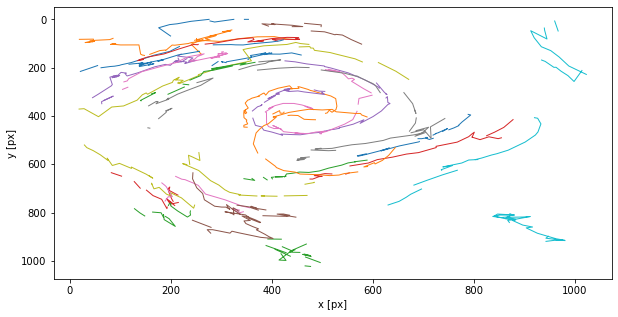

In [6]:
plt.figure()
tp.plot_traj(d);

# Filter spurious trajectories
We have more filtering to do. Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames.

In [7]:
t2 = tp.filter_stubs(d, 10)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', d['particle'].nunique())
print('After:', t2['particle'].nunique())

Before: 33
After: 33


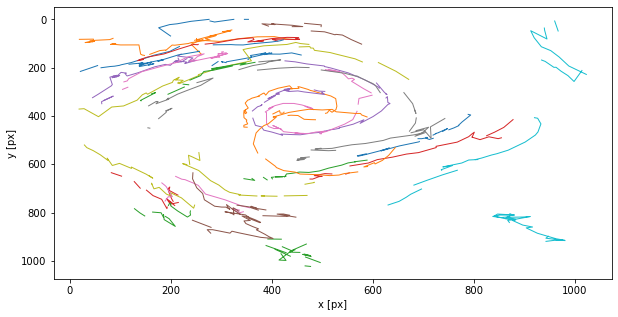

In [8]:
plt.figure()
tp.plot_traj(t2);

# Remove overall drift
Compute the overall drifting motion, which we will subtract away, adopting the reference frame of the particles' average position.

In [9]:
d1 = tp.compute_drift(t2) #computing overall drift

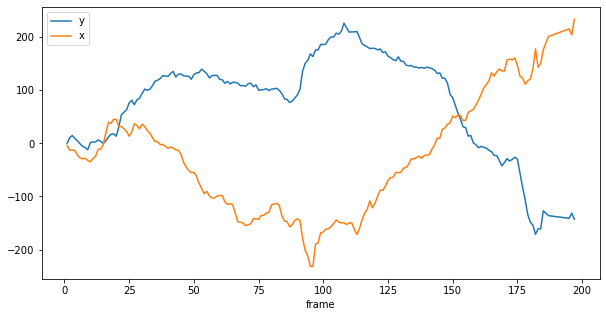

In [10]:
d1.plot()
plt.show()

In [11]:
tm = tp.subtract_drift(t2.copy(), d1) #removing drift

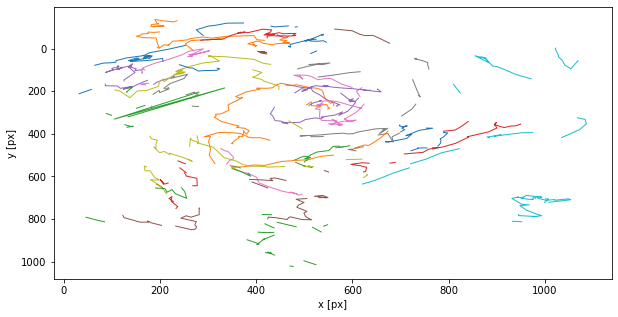

In [12]:
ax = tp.plot_traj(tm) #plotting the trajectory after removing the drift
plt.show()

# Mean Squared Displacement of Individual Probes
Compute the mean squared displacement (MSD) of each particle using the imsd function, and plot MSD vs. lag time.

In [13]:
im = tp.imsd(tm,.1,0.2)  # microns per pixel = 0.1, frames per second = 0.2, change accordingly

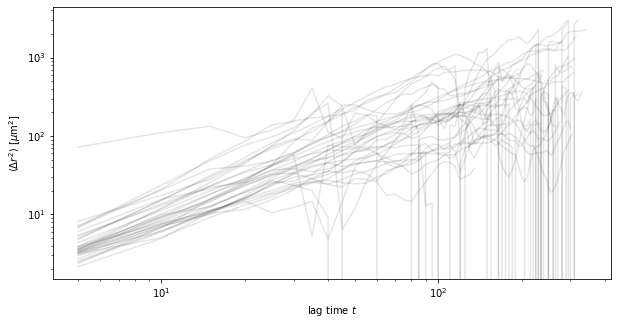

In [14]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

# Ensemble Mean Squared Displacement
Now use the emsd function to compute the ensemble mean squared displacement (EMSD) of all particles:

In [15]:
em = tp.emsd(tm,0.1,0.2) # microns per pixel = 0.1, frames per second = 0.2, change accordingly

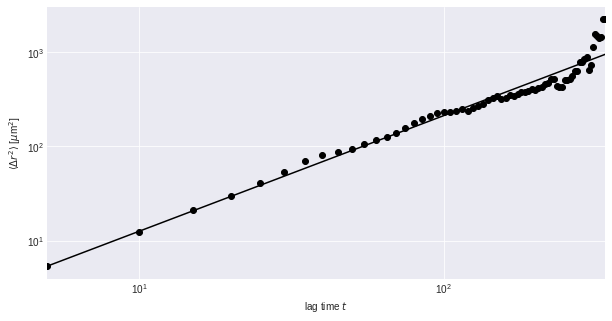

,n,A
msd,1.225621,0.750024


In [20]:
plt.figure()
plt.style.use('seaborn-darkgrid')
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em, color='k')  # performs linear best fit in log space and plots msd